# **Weather parameters forecasting using Machine Learning models, Temperature**

# **1. Getting the Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import math
weather_data= pd.DataFrame(pd.read_excel("everydaydata.xlsx"))
weather_data.head(15)

,Date/time,Airtemp min,Airtemp max,Airtemp mean,Rel.Hum min,Rel.Hum max,Rel.Hum mean,Day length durati,LeafWetness durati
0,2007-01-01,9.2,30.0,18.3,37.0,100,76.0,34800.0,0.0
1,2007-01-02,8.2,31.1,17.9,34.0,100,75.0,35100.0,0.0
2,2007-01-03,8.0,31.0,18.0,38.0,100,77.0,34800.0,0.0
3,2007-01-04,8.9,31.5,18.7,37.0,100,77.0,35400.0,0.0
4,2007-01-05,9.8,30.7,19.0,37.0,100,75.0,35400.0,0.0
5,2007-01-06,10.1,30.2,18.6,37.0,100,75.0,34500.0,0.0
6,2007-01-07,8.6,29.6,18.0,42.0,100,79.0,31500.0,0.0
7,2007-01-08,9.3,29.4,18.2,46.0,100,80.0,26100.0,0.0
8,2007-01-09,8.8,30.9,18.6,39.0,100,77.0,22800.0,0.0
9,2007-01-10,8.5,31.3,18.4,39.0,100,78.0,22500.0,0.0


# **2. Plotting the Graphs**

<AxesSubplot:ylabel='Frequency'>

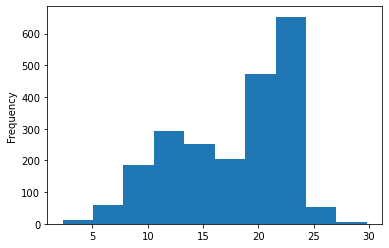

In [2]:
weather_data["Airtemp min"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

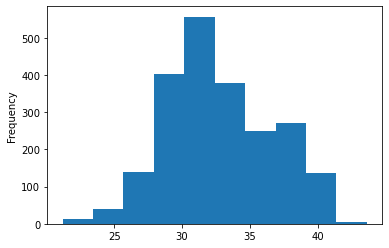

In [3]:
weather_data["Airtemp max"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

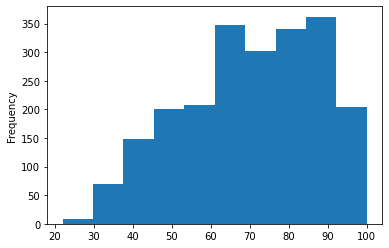

In [4]:
weather_data["Rel.Hum mean"].plot.hist()

# **3. Finding the Null values**

In [5]:
weather_data.isnull()

,Date/time,Airtemp min,Airtemp max,Airtemp mean,Rel.Hum min,Rel.Hum max,Rel.Hum mean,Day length durati,LeafWetness durati
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2187,False,False,False,False,False,False,False,False,False
2188,False,False,False,False,False,False,False,False,False
2189,False,False,False,False,False,False,False,False,False
2190,False,False,False,False,False,False,False,False,False


In [6]:
weather_data.isnull().sum()

Date/time             0
Airtemp min           0
Airtemp max           0
Airtemp mean          0
Rel.Hum min           0
Rel.Hum max           0
Rel.Hum mean          0
Day length durati     0
LeafWetness durati    0
dtype: int64

# **5. Droping the values**

In [7]:
weather_data.drop("Date/time", axis=1, inplace=True)
weather_data.head()

,Airtemp min,Airtemp max,Airtemp mean,Rel.Hum min,Rel.Hum max,Rel.Hum mean,Day length durati,LeafWetness durati
0,9.2,30.0,18.3,37.0,100,76.0,34800.0,0.0
1,8.2,31.1,17.9,34.0,100,75.0,35100.0,0.0
2,8.0,31.0,18.0,38.0,100,77.0,34800.0,0.0
3,8.9,31.5,18.7,37.0,100,77.0,35400.0,0.0
4,9.8,30.7,19.0,37.0,100,75.0,35400.0,0.0


In [8]:
X=weather_data.drop("Airtemp min",axis=1)
y=weather_data["Airtemp min"].values
y

array([ 9.2,  8.2,  8. , ...,  9.2, 10.9, 18.1])

In [9]:
y

array([ 9.2,  8.2,  8. , ...,  9.2, 10.9, 18.1])

# **7. Train and Test**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1,random_state=15)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)   #scale the training data and also learn the scaling parameters.
X_test = scaler.transform(X_test)

In [12]:
X_train

array([[4.95535714e-01, 5.80808081e-01, 5.88888889e-01, ...,
        8.58974359e-01, 8.64505688e-01, 4.51388889e-01],
       [6.78571429e-01, 6.86868687e-01, 2.22222222e-01, ...,
        5.00000000e-01, 9.48383119e-01, 0.00000000e+00],
       [7.63392857e-01, 6.26262626e-01, 8.88888889e-02, ...,
        2.94871795e-01, 8.77409908e-01, 0.00000000e+00],
       ...,
       [4.68750000e-01, 5.85858586e-01, 6.11111111e-01, ...,
        8.46153846e-01, 8.51601467e-01, 2.46527778e-01],
       [4.55357143e-01, 5.50505051e-01, 2.66666667e-01, ...,
        6.02564103e-01, 1.20080938e-04, 4.43672840e-05],
       [5.00000000e-01, 5.55555556e-01, 2.44444444e-01, ...,
        6.79487179e-01, 8.70957798e-01, 0.00000000e+00]])

##  Decision tree and adaboost regressor

In [13]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)        # number of methods for generating random numbers 
regr_1 = DecisionTreeRegressor(max_depth=4)  # maximum depth of the tree

# 299 boosts (300 decision trees) is compared with a single decision tree regressor. As the number of boosts is increased the regressor can fit more detail
regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1d = regr_1.predict(X_train)
y_2d = regr_1.predict(X_test)

y_1ad = regr_1.predict(X_train)
y_2ad = regr_2.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error as mse

In [15]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, y_1d), mse(y_test, y_2d)))

Mean Squared error on training data --> 2.998211316055292
Mean Squared error on test data --> 4.827431700229797


In [16]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, y_1ad), mse(y_test, y_2ad)))

Mean Squared error on training data --> 2.998211316055292
Mean Squared error on test data --> 1.8667041793458148


In [17]:
from math import sqrt
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, y_1d)), sqrt( mse(y_test, y_2d)) ))

root Mean Squared error on training data --> 1.7315343820020705
 root Mean Squared error on test data --> 2.1971417114582747


In [18]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, y_1ad)), sqrt( mse(y_test, y_2ad)) ))

root Mean Squared error on training data --> 1.7315343820020705
 root Mean Squared error on test data --> 1.366273830293845


In [19]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, y_1d), mae(y_test, y_2d)))

Mean absolute error on training data --> 1.3361704524230282
Mean absolute error on test data --> 1.6708328046069931


In [20]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, y_1ad), mae(y_test, y_2ad)))

Mean absolute error on training data --> 1.3361704524230282
Mean absolute error on test data --> 1.1118645758773913


In [21]:
# not shows expected or good result
import sklearn.metrics as metrics
r1_sk = metrics.r2_score(y_train,y_1d)
r2_sk = metrics.r2_score(y_test,y_2d)
print("R-Squared:", r1_sk)
#print("coefficient of determination on training data --> {}\n coefficient of determination on test data --> {}".format(r1_sk, r2_sk))

R-Squared: 0.8867026246838929


In [22]:
r1_sk = metrics.r2_score(y_train,y_1ad)
r2_sk = metrics.r2_score(y_test,y_2ad)
print("R-Squared:", r1_sk)

R-Squared: 0.8867026246838929


## linear regression

In [23]:
#LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
from sklearn.linear_model import LinearRegression as lr
lrr = lr().fit(X_train,y_train)

In [24]:
predlrtest = lrr.predict(X_test)
predlrtrain = lrr.predict(X_train)
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, predlrtrain), mse(y_test, predlrtest)))

Mean Squared error on training data --> 0.80538262706277
Mean Squared error on test data --> 0.7739181884211037


In [25]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, predlrtrain)), sqrt( mse(y_test, predlrtest)) ))

root Mean Squared error on training data --> 0.8974311266402397
 root Mean Squared error on test data --> 0.8797262008267707


In [26]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, predlrtrain), mae(y_test, predlrtest)))

Mean absolute error on training data --> 0.6517521642602937
Mean absolute error on test data --> 0.6791429792875348


In [27]:
r1_sk = metrics.r2_score(y_train,predlrtrain)
r2_sk = metrics.r2_score(y_test,predlrtest)
print("R-Squared:", r1_sk)

R-Squared: 0.9695659417724244


In [28]:
today = X_test[5].reshape(1,-1)
todaytemp = lrr.predict(today)
print(todaytemp)

[18.99957518]


## Ridge regression

In [29]:
# used to reduce complexity of model.This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf = clf.fit(X_train, y_train)
Ridge()

Ridge()

In [30]:
clftrain = clf.predict(X_train)
clftest = clf.predict(X_test)

In [31]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, clftrain), mse(y_test, clftest)))

Mean Squared error on training data --> 0.9390807222742275
Mean Squared error on test data --> 0.9920805908445518


In [32]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, clftrain)), sqrt( mse(y_test, clftest)) ))

root Mean Squared error on training data --> 0.9690617742302229
 root Mean Squared error on test data --> 0.9960324245949786


In [33]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, clftrain), mae(y_test, clftest)))

Mean absolute error on training data --> 0.7278824898424181
Mean absolute error on test data --> 0.7719419502116135


In [34]:
r1_sk = metrics.r2_score(y_train,clftrain)
r2_sk = metrics.r2_score(y_test,clftest)
print("R-Squared:", r1_sk)

R-Squared: 0.9645137150694211


In [35]:
today = X_test[5].reshape(1,-1)
todaytemp = clf.predict(today)
print(todaytemp)

[18.84158244]


## MLP regressor

In [36]:
from sklearn.neural_network import MLPRegressor as mlp
mlp = mlp(random_state=1, max_iter=1000).fit(X_train, y_train)

In [37]:
mlptrain = mlp.predict(X_train)
mlptest = mlp.predict(X_test)

In [38]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, clftrain), mse(y_test, clftest)))

Mean Squared error on training data --> 0.9390807222742275
Mean Squared error on test data --> 0.9920805908445518


In [39]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, clftrain)), sqrt( mse(y_test, clftest)) ))

root Mean Squared error on training data --> 0.9690617742302229
 root Mean Squared error on test data --> 0.9960324245949786


In [40]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, clftrain), mae(y_test, clftest)))

Mean absolute error on training data --> 0.7278824898424181
Mean absolute error on test data --> 0.7719419502116135


In [41]:
r1_sk = metrics.r2_score(y_train,mlptrain)
r2_sk = metrics.r2_score(y_test,mlptest)
print("R-Squared:", r1_sk)

R-Squared: 0.9759256456816451


In [42]:
today = X_test[5].reshape(1,-1)
todaytemp = mlp.predict(today)
print(todaytemp)

[19.05870112]


## lasso regression

In [43]:
from sklearn import linear_model as lm
lms = lm.Lasso(alpha=0.1).fit(X_train, y_train)

In [44]:
lmstrain = lms.predict(X_train)
lmstest = lms.predict(X_test)

In [45]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, lmstrain), mse(y_test, lmstest)))

Mean Squared error on training data --> 3.0771718451426224
Mean Squared error on test data --> 3.076314823205804


In [46]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, lmstrain)), sqrt( mse(y_test, lmstest)) ))

root Mean Squared error on training data --> 1.7541869470334746
 root Mean Squared error on test data --> 1.7539426510595504


In [47]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, lmstrain), mae(y_test, lmstest)))

Mean absolute error on training data --> 1.361094574606526
Mean absolute error on test data --> 1.4152028922154807


In [48]:
r1_sk = metrics.r2_score(y_train,lmstrain)
r2_sk = metrics.r2_score(y_test,lmstest)
print("R-Squared:", r1_sk)

R-Squared: 0.8837188387675168


In [49]:
today = X_test[5].reshape(1,-1)
todaytemp = lms.predict(today)
print(todaytemp)

[17.96733]


## random forest regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor as rfr
regr = rfr(max_depth=2, random_state=0)
regrn = regr.fit(X_train, y_train)

In [51]:
rfrtrain = regrn.predict(X_train)
rfrtest = regrn.predict(X_test)

In [52]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, rfrtrain), mse(y_test, rfrtest)))

Mean Squared error on training data --> 6.563138479181763
Mean Squared error on test data --> 8.365678832661237


In [53]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, rfrtrain)), sqrt( mse(y_test, rfrtest)) ))

root Mean Squared error on training data --> 2.561862306834964
 root Mean Squared error on test data --> 2.892348324918912


In [54]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, rfrtrain), mae(y_test, rfrtest)))

Mean absolute error on training data --> 1.972001985219413
Mean absolute error on test data --> 2.2303573678327924


In [55]:
r1_sk = metrics.r2_score(y_train,rfrtrain)
r2_sk = metrics.r2_score(y_test,rfrtest)
print("R-Squared:", r1_sk)


R-Squared: 0.7519900083274427


In [56]:
X_test[5]

array([0.36160714, 0.54040404, 0.44444444, 0.89705882, 0.61538462,
       0.81934092, 0.        ])

In [57]:
today = X_test[5].reshape(1,-1)
todaytemp = regr.predict(today)
print(todaytemp)

[21.39692785]


## KNeighborsRegressor

In [58]:
from sklearn.neighbors import KNeighborsRegressor as knr
neigh = knr(n_neighbors=2)
knrn = neigh.fit(X_train, y_train)

In [59]:
knrtrain = knrn.predict(X_train)
knrtest = knrn.predict(X_test)

In [60]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, knrtrain), mse(y_test, knrtest)))

Mean Squared error on training data --> 0.500339756592292
Mean Squared error on test data --> 2.3427954545454543


In [61]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, knrtrain)), sqrt( mse(y_test, knrtest)) ))

root Mean Squared error on training data --> 0.7073469845784967
 root Mean Squared error on test data --> 1.530619304250882


In [62]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, knrtrain), mae(y_test, knrtest)))

Mean absolute error on training data --> 0.5192697768762677
Mean absolute error on test data --> 1.0563636363636366


In [63]:
r1_sk = metrics.r2_score(y_train,knrtrain)
r2_sk = metrics.r2_score(y_test,knrtest)
print("R-Squared:", r1_sk)

R-Squared: 0.9810930000548497


In [64]:
today = X_test[5].reshape(1,-1)
todaytemp = knrn.predict(today)
print(todaytemp)

[19.15]


## SVM linera SVR

In [65]:
from sklearn.svm import LinearSVR as svm
from sklearn.pipeline import make_pipeline as mp
from sklearn.preprocessing import StandardScaler
regr = mp(StandardScaler(), svm(random_state=0, tol=2e-5))
svmn = regr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [66]:
svmtrain = svmn.predict(X_train)
svmtest = svmn.predict(X_test)

In [67]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, svmtrain), mse(y_test, svmtest)))

Mean Squared error on training data --> 0.8110842794121261
Mean Squared error on test data --> 0.7752402795564145


In [68]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, svmtrain)), sqrt( mse(y_test, svmtest)) ))

root Mean Squared error on training data --> 0.9006021759978854
 root Mean Squared error on test data --> 0.8804773021244866


In [69]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, svmtrain), mae(y_test, svmtest)))

Mean absolute error on training data --> 0.6491044148216771
Mean absolute error on test data --> 0.6760361327370066


In [70]:
r1_sk = metrics.r2_score(y_train,svmtrain)
r2_sk = metrics.r2_score(y_test,svmtest)
print("R-Squared:", r1_sk)

R-Squared: 0.9693504858962199


In [71]:
today = X_test[5].reshape(1,-1)
todaytemp = svmn.predict(today)
print(todaytemp)

[19.07868976]


## AdaBoostregressor 

In [72]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regrn = regr.fit(X_train, y_train)

In [73]:
regrtrain = regrn.predict(X_train)
regrtest = regrn.predict(X_test)

In [74]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, regrtrain), mse(y_test, regrtest)))

Mean Squared error on training data --> 2.1827386338678343
Mean Squared error on test data --> 2.7699274714733066


In [75]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, regrtrain)), sqrt( mse(y_test, regrtest)) ))

root Mean Squared error on training data --> 1.477409433389348
 root Mean Squared error on test data --> 1.6643099084825839


In [76]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, regrtrain), mae(y_test, regrtest)))

Mean absolute error on training data --> 1.2431207660675843
Mean absolute error on test data --> 1.4250922353878512


In [77]:
today = X_test[5].reshape(1,-1)
todaytemp = regrn.predict(today)
print(todaytemp)

[19.77174349]


# maximum temperature

In [78]:
Xmax=weather_data.drop("Airtemp max",axis=1)
ymax=weather_data["Airtemp max"].values
ymax

array([30. , 31.1, 31. , ..., 31.6, 32.8, 31.7])

In [79]:
xmax = Xmax.iloc[:,:]
type(xmax)

pandas.core.frame.DataFrame

In [80]:
ymax

array([30. , 31.1, 31. , ..., 31.6, 32.8, 31.7])

## train and test split data 

In [81]:
from sklearn.model_selection import train_test_split
X_trainmax, X_testmax, y_trainmax, y_testmax= train_test_split(Xmax,ymax,test_size=0.1,random_state=15)

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trainmax = scaler.fit_transform(X_trainmax)
X_testmax = scaler.transform(X_testmax)

# # Decision tree and adaboost regressor¶

In [83]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rngmax = np.random.RandomState(1)
regr_1max = DecisionTreeRegressor(max_depth=4)

regr_2max = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X_trainmax, y_trainmax)
regr_2.fit(X_trainmax, y_trainmax)

y_1maxd = regr_1.predict(X_trainmax)
y_2maxd = regr_1.predict(X_testmax)

y_1maxad = regr_2.predict(X_trainmax)
y_2maxad = regr_2.predict(X_testmax)

In [84]:
from sklearn.metrics import mean_squared_error as mse

In [85]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainmax, y_1maxd), mse(y_testmax, y_2maxd)))

Mean Squared error on training data --> 3.2162978871454304
Mean Squared error on test data --> 3.650327025048616


In [86]:
from math import sqrt
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainmax, y_1maxd)), sqrt( mse(y_testmax, y_2maxd)) ))

root Mean Squared error on training data --> 1.7934039944043367
 root Mean Squared error on test data --> 1.910582901904185


In [87]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainmax, y_1maxd), mae(y_testmax, y_2maxd)))

Mean absolute error on training data --> 1.3754989132829742
Mean absolute error on test data --> 1.4165437223943946


In [88]:
import sklearn.metrics as metrics
r1_skmax = metrics.r2_score(y_trainmax,y_1maxd)
r2_skmax = metrics.r2_score(y_testmax,y_2maxd)
print("R-Squared:", r1_skmax)

R-Squared: 0.7888341424950445


In [89]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainmax, y_1maxad), mse(y_testmax, y_2maxad)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainmax, y_1maxad)), sqrt( mse(y_testmax, y_2maxad))))  
                                                                                                            
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainmax, y_1maxad), mae(y_testmax, y_2maxad)))
                                                                                            
r1_skmax = metrics.r2_score(y_trainmax,y_1maxad)
r2_skmax = metrics.r2_score(y_testmax,y_2maxad)
print("R-Squared:", r1_skmax)

Mean Squared error on training data --> 1.1928862042916397
Mean Squared error on test data --> 1.7271195189361734
root Mean Squared error on training data --> 1.0921932998749075
 root Mean Squared error on test data --> 1.3141991930206673
Mean absolute error on training data --> 0.9042629293636198
Mean absolute error on test data --> 1.0623927543784408
R-Squared: 0.9216811231192761


# # linear regression

In [90]:
from sklearn.linear_model import LinearRegression as lr
lrrmax = lr().fit(X_trainmax,y_trainmax)

In [91]:
predlrtest = lrrmax.predict(X_testmax)
predlrtrain = lrrmax.predict(X_trainmax)
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainmax, predlrtrain), mse(y_testmax, predlrtest)))

Mean Squared error on training data --> 0.8336534537816594
Mean Squared error on test data --> 0.7897444858900048


In [92]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainmax, predlrtrain)), sqrt( mse(y_testmax, predlrtest)) ))

root Mean Squared error on training data --> 0.9130462495304712
 root Mean Squared error on test data --> 0.888675692190354


In [93]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainmax, predlrtrain), mae(y_testmax, predlrtest)))

Mean absolute error on training data --> 0.6624999067932773
Mean absolute error on test data --> 0.6761395357551525


In [94]:
r1_sk = metrics.r2_score(y_trainmax,predlrtrain)
r2_sk = metrics.r2_score(y_testmax,predlrtest)
print("R-Squared:", r1_sk)

R-Squared: 0.9452665292187806


In [95]:
today = X_testmax[5].reshape(1,-1)
todaytemp = lrrmax.predict(today)
print(todaytemp)

[29.17221359]


# # Ridge regression

In [96]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf = clf.fit(X_trainmax, y_trainmax)
Ridge()

Ridge()

In [97]:
clftrain = clf.predict(X_trainmax)
clftest = clf.predict(X_testmax)

In [98]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainmax, clftrain), mse(y_testmax, clftest)))

Mean Squared error on training data --> 1.0217097279639367
Mean Squared error on test data --> 1.0557684733619477


In [99]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainmax, clftrain)), sqrt( mse(y_testmax, clftest)) ))

root Mean Squared error on training data --> 1.0107965809023776
 root Mean Squared error on test data --> 1.0275059480907873


In [100]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainmax, clftrain), mae(y_testmax, clftest)))

Mean absolute error on training data --> 0.7597719795130318
Mean absolute error on test data --> 0.8118501569149854


In [101]:
r1_sk = metrics.r2_score(y_trainmax,clftrain)
r2_sk = metrics.r2_score(y_testmax,clftest)
print("R-Squared:", r1_sk)

R-Squared: 0.9329197050780191


In [102]:
today = X_testmax[10].reshape(1,-1)
todaytemp = clf.predict(today)
print(todaytemp)

[31.54423748]


# # MLP regressor

In [103]:
from sklearn.neural_network import MLPRegressor as mlp
mlp = mlp(random_state=1, max_iter=1000).fit(X_trainmax, y_trainmax)

In [104]:
mlptrain = mlp.predict(X_trainmax)
mlptest = mlp.predict(X_testmax)

In [105]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainmax, clftrain), mse(y_testmax, clftest)))

Mean Squared error on training data --> 1.0217097279639367
Mean Squared error on test data --> 1.0557684733619477


In [106]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainmax, clftrain)), sqrt( mse(y_testmax, clftest)) ))

root Mean Squared error on training data --> 1.0107965809023776
 root Mean Squared error on test data --> 1.0275059480907873


In [107]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainmax, clftrain), mae(y_testmax, clftest)))

Mean absolute error on training data --> 0.7597719795130318
Mean absolute error on test data --> 0.8118501569149854


In [108]:
r1_sk = metrics.r2_score(y_trainmax, mlptrain)
r2_sk = metrics.r2_score(y_testmax, mlptest)
print("R-Squared:", r1_sk)

R-Squared: 0.9569170883285585


In [109]:
today = X_testmax[5].reshape(1,-1)
todaytemp = mlp.predict(today)
print(todaytemp)

[29.14001477]


# # lasso regression

In [110]:
from sklearn import linear_model as lm
lms = lm.Lasso(alpha=0.1).fit(X_trainmax, y_trainmax)

In [111]:
lmstrain = lms.predict(X_trainmax)
lmstest = lms.predict(X_testmax)

In [112]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainmax, lmstrain), mse(y_testmax, lmstest)))

Mean Squared error on training data --> 3.2731705059551097
Mean Squared error on test data --> 3.121602519543005


In [113]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainmax, lmstrain)), sqrt( mse(y_testmax, lmstest)) ))

root Mean Squared error on training data --> 1.8091905665117507
 root Mean Squared error on test data --> 1.7668057390508456


In [114]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainmax, lmstrain), mae(y_testmax, lmstest)))

Mean absolute error on training data --> 1.3465928934386435
Mean absolute error on test data --> 1.4163072852347522


In [115]:
r1_sk = metrics.r2_score(y_trainmax,lmstrain)
r2_sk = metrics.r2_score(y_testmax,lmstest)
print("R-Squared:", r1_sk)

R-Squared: 0.7851001738948421


In [116]:
today = X_testmax[5].reshape(1,-1)
todaytemp = lms.predict(today)
print(todaytemp)

[31.96886375]


# # Random forest regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor as rfr
regr = rfr(max_depth=2, random_state=0)
regrn = regr.fit(X_trainmax, y_trainmax)

In [118]:
rfrtrain = regrn.predict(X_trainmax)
rfrtest = regrn.predict(X_testmax)

In [119]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainmax, rfrtrain), mse(y_testmax, rfrtest)))

Mean Squared error on training data --> 4.916342748386581
Mean Squared error on test data --> 4.217881046692576


In [120]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainmax, rfrtrain)), sqrt( mse(y_testmax, rfrtest)) ))

root Mean Squared error on training data --> 2.217282739838693
 root Mean Squared error on test data --> 2.053748048493918


In [121]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainmax, rfrtrain), mae(y_testmax, rfrtest)))

Mean absolute error on training data --> 1.7016915447686558
Mean absolute error on test data --> 1.5566397420177809


In [122]:
r1_sk = metrics.r2_score(y_trainmax,rfrtrain)
r2_sk = metrics.r2_score(y_testmax,rfrtest)
print("R-Squared:", r1_sk)

R-Squared: 0.6772177924188713


In [123]:
today = X_testmax[5].reshape(1,-1)
today = 
todaytemp = regrn.predict(today)
print(todaytemp)

SyntaxError: invalid syntax (2157359861.py, line 2)

# # KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as knr
neigh = knr(n_neighbors=2)
knrn = neigh.fit(X_trainmax, y_trainmax)

In [ ]:
knrtrain = knrn.predict(X_trainmax)
knrtest = knrn.predict(X_testmax)

In [ ]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainmax, knrtrain), mse(y_testmax, knrtest)))

In [ ]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainmax, knrtrain)), sqrt( mse(y_testmax, knrtest)) ))

In [ ]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainmax, knrtrain), mae(y_testmax, knrtest)))

In [ ]:
r1_sk = metrics.r2_score(y_trainmax, knrtrain)
r2_sk = metrics.r2_score(y_testmax, knrtest)
print("R-Squared:", r1_sk)

In [ ]:
today = X_testmax[5].reshape(1,-1)
todaytemp = knrn.predict(today)
print(todaytemp)

# # adaboost regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regrn = regr.fit(X_trainmax, y_trainmax)

In [ ]:
regrtrain = regrn.predict(X_trainmax)
regrtest = regrn.predict(X_testmax)

In [ ]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainmax, regrtrain), mse(y_testmax, regrtest)))

In [ ]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainmax, regrtrain)), sqrt( mse(y_testmax, regrtest)) ))

In [ ]:
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainmax, regrtrain), mae(y_testmax, regrtest)))

In [ ]:
r1_sk = metrics.r2_score(y_trainmax, knrtrain)
r2_sk = metrics.r2_score(y_testmax, knrtest)
print("R-Squared:", r1_sk)

In [ ]:
today = X_testmax[5].reshape(1,-1)
todaytemp = regrn.predict(today)
print(todaytemp)

#  SVM linear regression

In [ ]:
from sklearn.svm import LinearSVR as svm
from sklearn.pipeline import make_pipeline as mp
from sklearn.preprocessing import StandardScaler
regr = mp(StandardScaler(), svm(random_state=0, tol=2e-5))
svmn = regr.fit(X_trainmax, y_trainmax)

In [ ]:
svmtrain = svmn.predict(X_trainmax)
svmtest = svmn.predict(X_testmax)

In [ ]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainmax, svmtrain), mse(y_testmax, svmtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainmax, svmtrain)), sqrt( mse(y_testmax, svmtest))))  
                                                                                                            
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainmax, svmtrain), mae(y_testmax, svmtest)))
                                                                                            
r1_skmax = metrics.r2_score(y_trainmax,svmtrain)
r2_skmax = metrics.r2_score(y_testmax,svmtest)
print("R-Squared:", r1_skmax)

In [ ]:
today = X_testmax[50].reshape(1,-1)
todaytemp = svmn.predict(today)
print(todaytemp)